<a href="https://colab.research.google.com/github/Shivam-Verma1/Sampling/blob/main/Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats


df = pd.read_csv('/content/sample_data/Creditcard_data.csv')

# New Section

In [4]:
def class_distribution(y): #Simply counting the number of samples in each class
    counts = y.value_counts()
    distribution = counts/len(y)
    return distribution

def plot_class_distribution(y): #Bar chart to visualize the distribution of classes
    plt.figure(figsize=(8,6))
    perct = y.value_counts(normalize = True)*100

    sns.barplot(x = perct.index, y = perct.values)
    plt.title('Class Distr. (percentage)')
    plt.ylabel('Percentage')
    plt.xlabel('Class')
    plt.show()

def imbalance_ratio(y): #Finding the imbalance ratio
    counts = y.value_counts()
    ratio = counts.max()/counts.min()
    return ratio

def gini_coefficient(y):#Finds the gini coefficient, a measure of statistical dispersion
    counts = y.value_counts()
    p = counts/len(y)
    gini = 1-sum(p**2)
    return gini

In [5]:
y = df['Class']
print(y)

0      0
1      1
2      0
3      0
4      0
      ..
767    0
768    0
769    0
770    0
771    0
Name: Class, Length: 772, dtype: int64


In [6]:
class_dist = class_distribution(y)
print("Class Distribution: ")
print(class_dist)

Class Distribution: 
0    0.988342
1    0.011658
Name: Class, dtype: float64


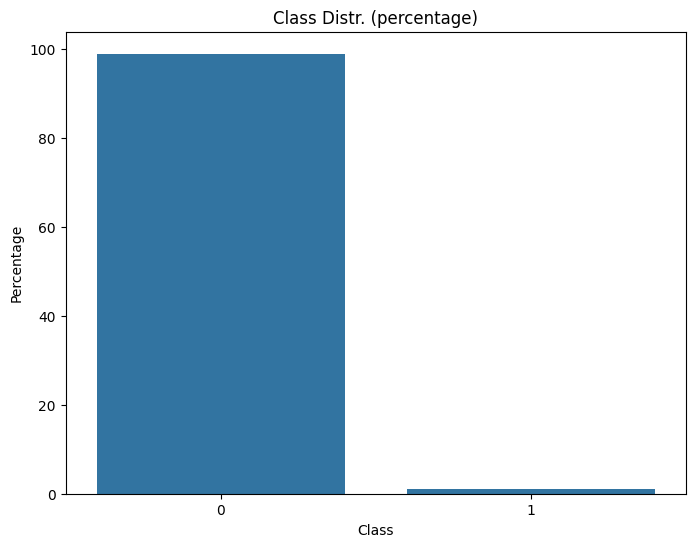

In [7]:

plot_class_distribution(y)

In [8]:
imbal_ratio = imbalance_ratio(y)
print(f"Imbalance Ratio: {imbal_ratio}")

gini_coeff = gini_coefficient(y)
print(f'Gini Coefficient: {gini_coeff}')

Imbalance Ratio: 84.77777777777777
Gini Coefficient: 0.02304424279846451


Inference:
Clearly the data is too much imbalanced and we wont be able to train a model properly on this
Following cells we will implement our sampling techniques

In [9]:
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.combine import SMOTETomek, SMOTEENN

In [11]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.2 MB/s eta 0:00:00


In [13]:
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X = df.drop(columns = 'Class')
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [24]:
models = {
   'CatBoost': CatBoostClassifier(random_state=42, verbose=False),
    'XGBoost': XGBClassifier(random_state=42, verbosity=0),
    'LightGBM': LGBMClassifier(random_state=42),
    'SVC': SVC(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42)
}

samplers = {
    'RandomOverSampler': RandomOverSampler(sampling_strategy='auto', random_state=42),
    'SMOTE': SMOTE(sampling_strategy='auto', random_state=42),
    'RandomUnderSampler': RandomUnderSampler(sampling_strategy='auto', random_state=42),
    'NearMiss': NearMiss(sampling_strategy='auto', version=1),
    'TomekLinks': TomekLinks(sampling_strategy='auto')
}

In [25]:
%%capture
results_table = pd.DataFrame(columns = ['Model', 'Sampler', 'Accuracy'])

for model_name, model in models.items():
    for sampler_name, sampler in samplers.items():

        X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
        model.fit(X_resampled, y_resampled)

        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        results_table = results_table.append({
            'Model':model_name,
            'Sampler':sampler_name,
            'Accuracy':accuracy,
        }, ignore_index = True)

In [26]:
print(results_table)

           Model             Sampler  Accuracy
0       CatBoost   RandomOverSampler  0.993548
1       CatBoost               SMOTE  0.993548
2       CatBoost  RandomUnderSampler  0.741935
3       CatBoost            NearMiss  0.341935
4       CatBoost          TomekLinks  0.993548
5        XGBoost   RandomOverSampler  0.993548
6        XGBoost               SMOTE  0.980645
7        XGBoost  RandomUnderSampler  0.600000
8        XGBoost            NearMiss  0.096774
9        XGBoost          TomekLinks  0.993548
10      LightGBM   RandomOverSampler  0.993548
11      LightGBM               SMOTE  0.993548
12      LightGBM  RandomUnderSampler  0.993548
13      LightGBM            NearMiss  0.993548
14      LightGBM          TomekLinks  0.993548
15           SVC   RandomOverSampler  0.696774
16           SVC               SMOTE  0.670968
17           SVC  RandomUnderSampler  0.625806
18           SVC            NearMiss  0.348387
19           SVC          TomekLinks  0.993548
20  RandomFor